# High School Student's Academic Performance Analysis

**Project overview**

A reproducible analysis of the "Students Performance" dataset. The notebook performs exploratory data analysis (EDA), visualizes missing values, inspects distributions and relationships among features, and demonstrates basic modeling and evaluation steps for predicting student performance.

Loading the essential libraries

In [4]:
import pandas as pd
import missingno as msno
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib inline

In [5]:
import warnings
warnings.filterwarnings("ignore")

Loading the CSV file

In [6]:
df=pd.read_csv("/content/StudentsPerformance.csv")

Overview of the dataset

In [7]:
df.shape

(1000, 8)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [9]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [10]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

Analysis of missing values

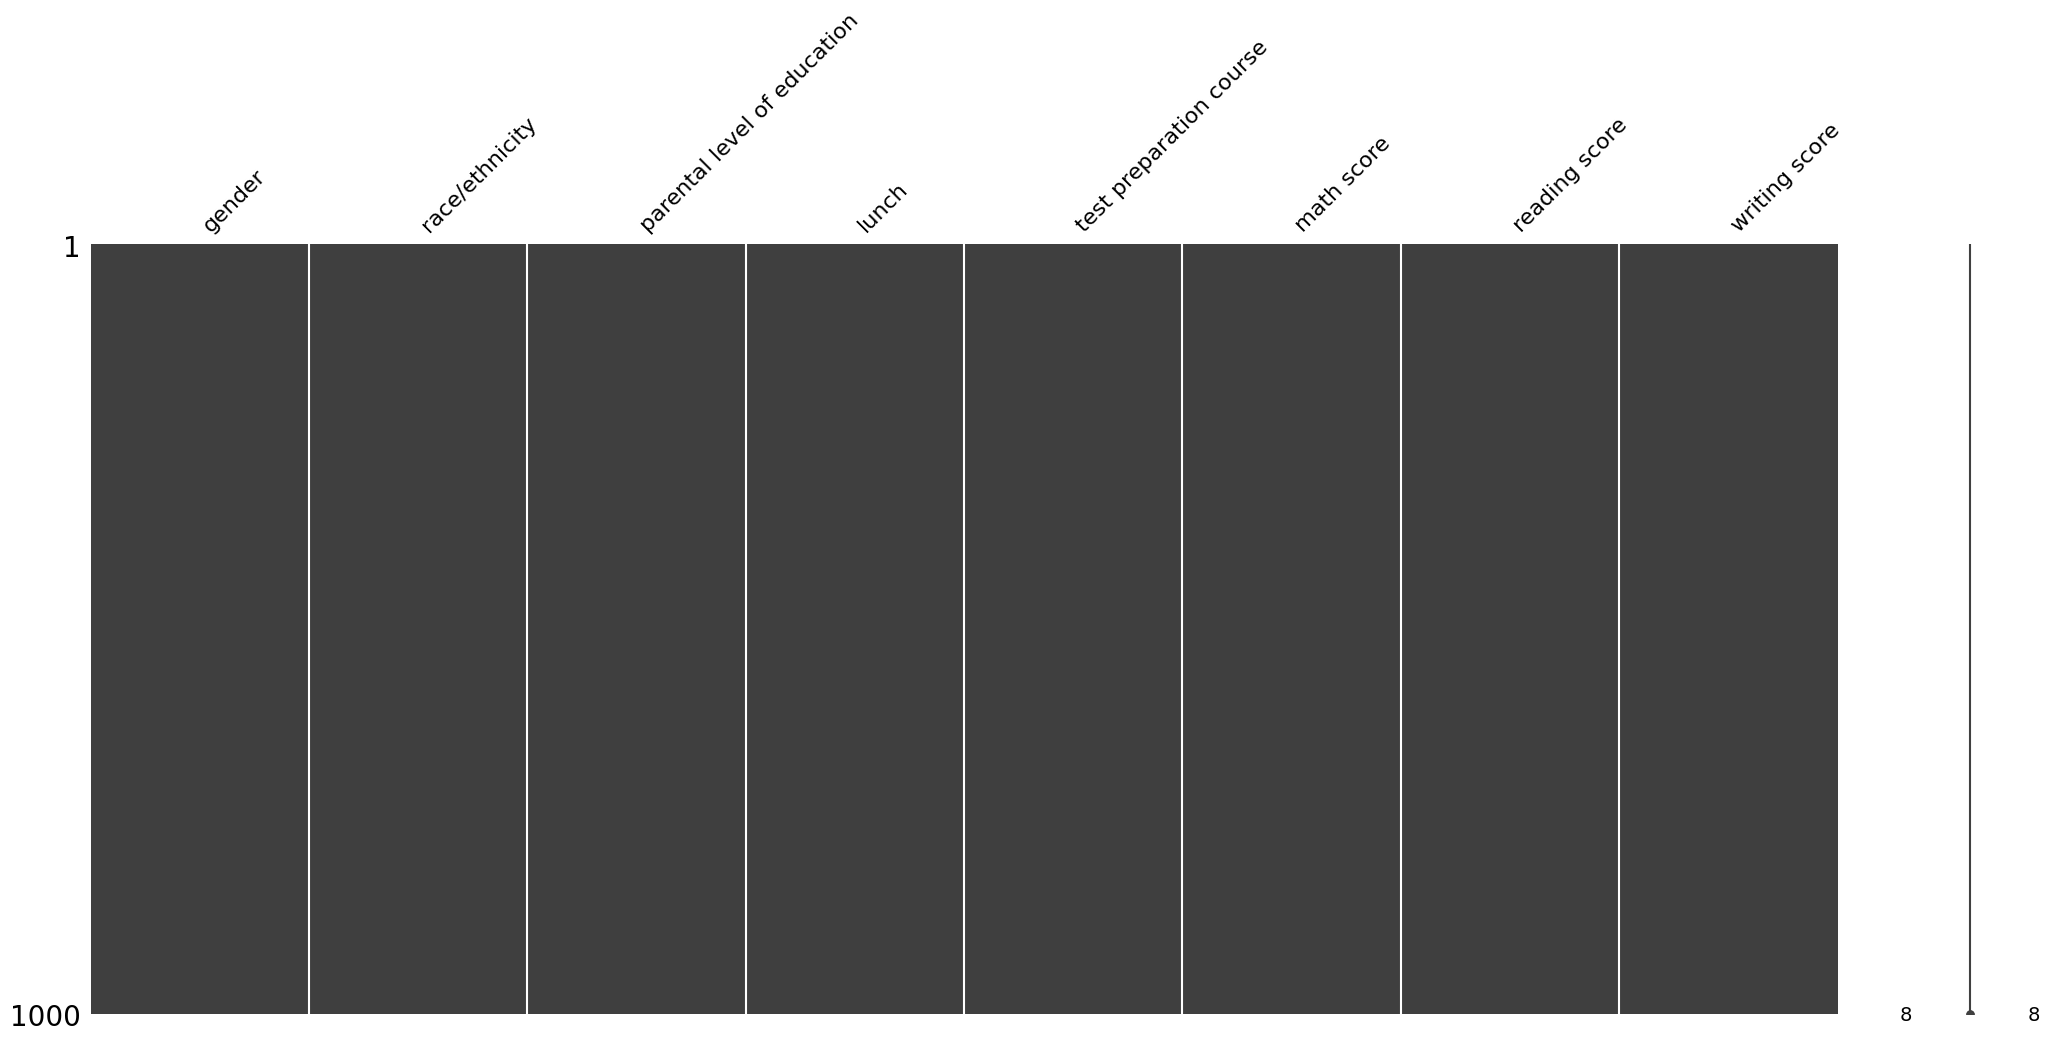

In [11]:
msno.matrix(df);

In [12]:
df.isna().sum()

,0
gender,0
race/ethnicity,0
parental level of education,0
lunch,0
test preparation course,0
math score,0
reading score,0
writing score,0


In [13]:
#setting the passmarks as 35
passmark=35

Total_Marks, Percentage and grade columns are created

In [14]:
df['Percentage'] = (df['math score']+df['reading score']+df['writing score'])/3

Grading according to the marks

In [15]:
def Grade(Percentage):
    if (Percentage >= 95):return 'O'
    if (Percentage >= 81):return 'A'
    if (Percentage >= 71):return 'B'
    if (Percentage >= 61):return 'C'
    if (Percentage >= 51):return 'D'
    if (Percentage >= 41):return 'E'
    else: return 'F'

df["grade"] = df.apply(lambda x : Grade(x["Percentage"]), axis=1)

In [16]:
df.head(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Percentage,grade
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667,B
1,female,group C,some college,standard,completed,69,90,88,82.333333,A
2,female,group B,master's degree,standard,none,90,95,93,92.666667,A
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333,E
4,male,group C,some college,standard,none,76,78,75,76.333333,B
5,female,group B,associate's degree,standard,none,71,83,78,77.333333,B
6,female,group B,some college,standard,completed,88,95,92,91.666667,A
7,male,group B,some college,free/reduced,none,40,43,39,40.666667,F
8,male,group D,high school,free/reduced,completed,64,64,67,65.000000,C
9,female,group B,high school,free/reduced,none,38,60,50,49.333333,E


In [17]:
df.describe()

,math score,reading score,writing score,Percentage
count,1000.00000,1000.000000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000,67.770667
std,15.16308,14.600192,15.195657,14.257326
min,0.00000,17.000000,10.000000,9.000000
25%,57.00000,59.000000,57.750000,58.333333
50%,66.00000,70.000000,69.000000,68.333333
75%,77.00000,79.000000,79.000000,77.666667
max,100.00000,100.000000,100.000000,100.000000


Data visualization

Percentage of students in terms of gender

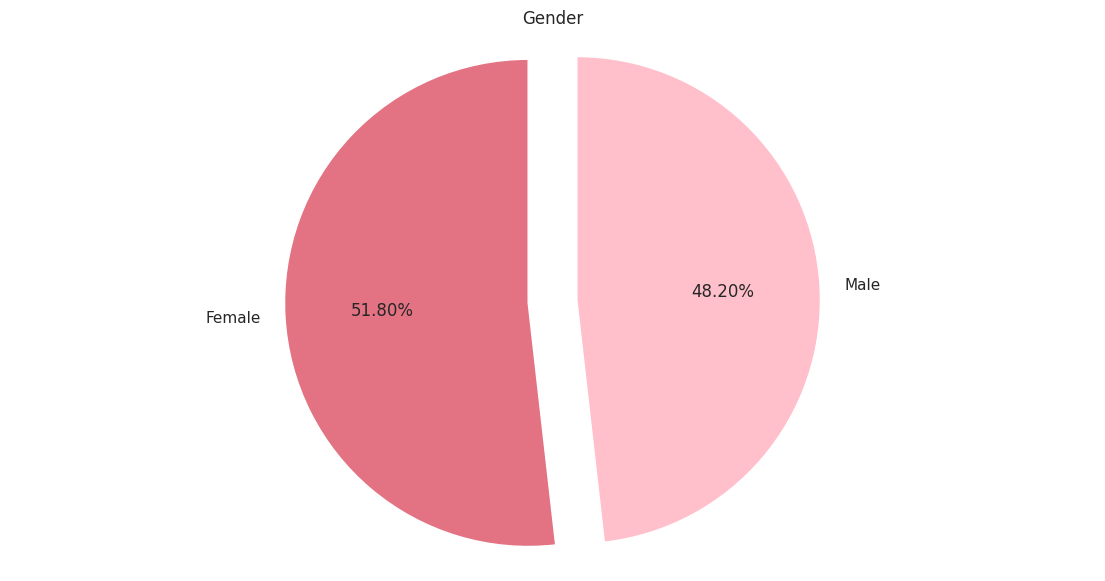

In [23]:
sns.set(style='whitegrid')
plt.figure(figsize=(14, 7))
labels=['Female', 'Male']
plt.pie(df['gender'].value_counts(),labels=labels,explode=[0.1,0.1],
        autopct='%1.2f%%',colors=['#E37383','#FFC0CB'], startangle=90)
plt.title('Gender')
plt.axis('equal')
plt.show()

Gender vs Grades

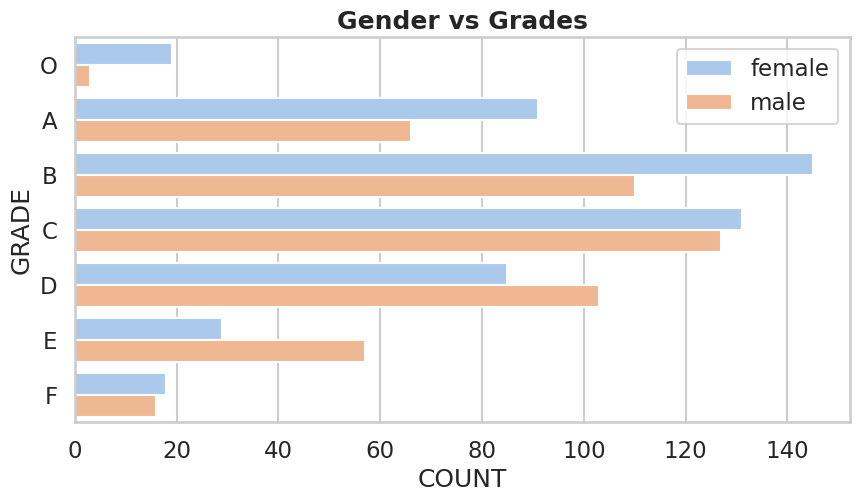

In [19]:
plt.figure(figsize=(10,5))
sns.set_context("talk",font_scale=1)
sns.set_palette("pastel")
ax = sns.countplot(y="grade", hue="gender", data=df, order=["O","A","B","C","D","E","F"])
ax.legend(loc='upper right',frameon=True)
plt.title('Gender vs Grades', fontsize=18, fontweight='bold')
ax.set(xlabel='COUNT',ylabel='GRADE')
plt.show()

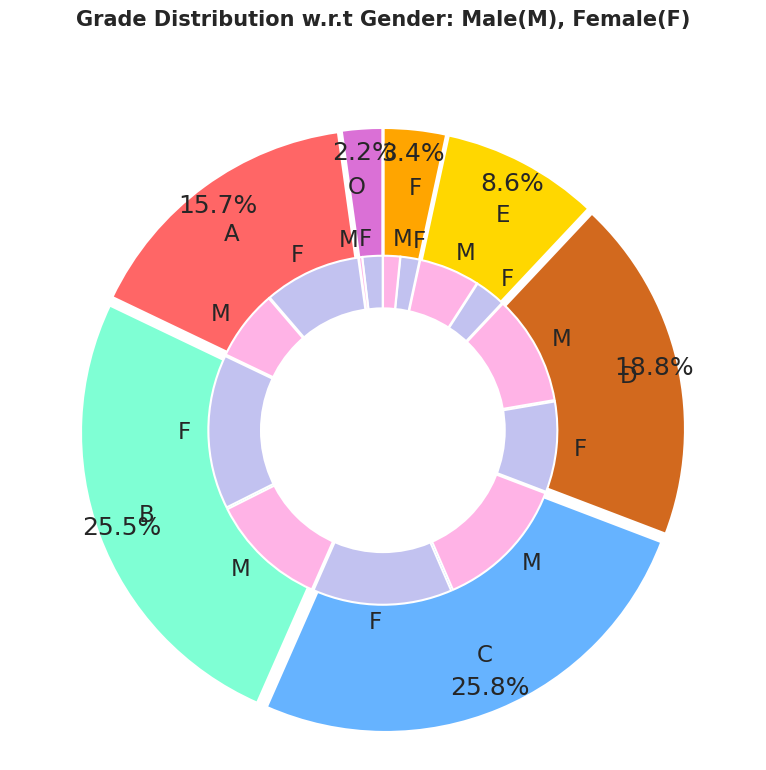

In [20]:
plt.figure(figsize=(8, 8))
labels =["O","A","B","C","D","E","F"]
values = [22,157,255,258,188,86,34]
labels_gender = ["F","M","F","M","F","M","F","M","F","M","F","M","F","M"]
sizes_gender = [19,3,91,66,145,110,131,127,85,103,29,57,18,16]
colors = ['orchid', '#ff6666', 'aquamarine', '#66b3ff','chocolate','gold','orange']
colors_gender = ['#c2c2f0','#ffb3e6', '#c2c2f0','#ffb3e6', '#c2c2f0','#ffb3e6', '#c2c2f0','#ffb3e6', '#c2c2f0','#ffb3e6', '#c2c2f0','#ffb3e6', '#c2c2f0','#ffb3e6']
explode = (0.3,0.3,0.3,0.3,0.3,0.3,0.3)
explode_gender = (0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1)
#Plot
plt.pie(values, labels=labels,autopct='%1.1f%%' ,pctdistance=0.92, labeldistance=0.80,colors=colors, startangle=90,frame=True, explode=explode,radius=12)
plt.pie(sizes_gender,labels=labels_gender,colors=colors_gender,startangle=90, explode=explode_gender,radius=7)
#Draw circle
centre_circle = plt.Circle((0,0),5,color='black', fc='white',linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Grade Distribution w.r.t Gender: Male(M), Female(F)', fontsize=15, fontweight='bold',y=1.1)

# show plot

plt.axis('equal')
plt.tight_layout()
plt.show()

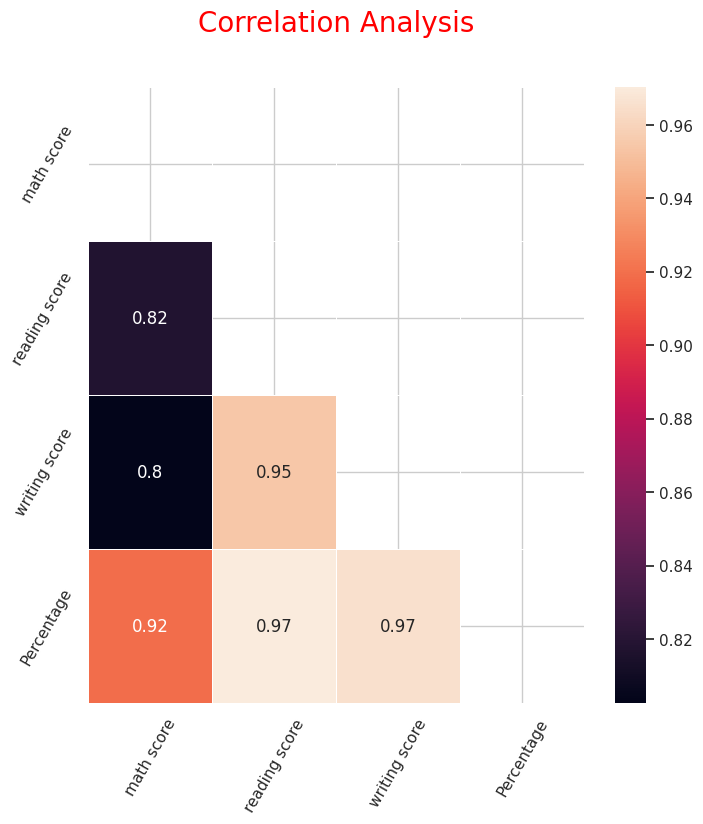

In [25]:
plt.figure(figsize=(8,8))
plt.title('Correlation Analysis',color='Red',fontsize=20,pad=40)

# Select only numerical columns for correlation calculation
corr = df.select_dtypes(include=[np.number]).corr()
mask = np.triu(np.ones_like(corr,dtype = bool))
sns.heatmap(corr,mask=mask,annot=True,linewidths=.5);
plt.xticks(rotation=60)
plt.yticks(rotation = 60)
plt.show()

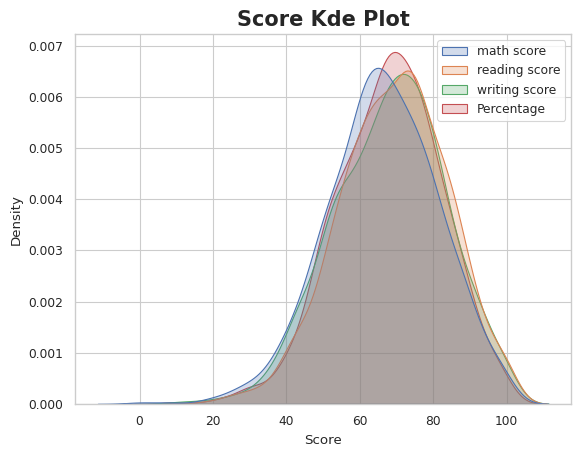

In [26]:
sns.set_context("paper",font_scale=1)
sns.kdeplot(data=df,shade = True)
plt.xlabel('Score')
plt.title('Score Kde Plot', fontsize=15, fontweight='bold')
plt.show()

Reading vs Mathematics score in terms of gender

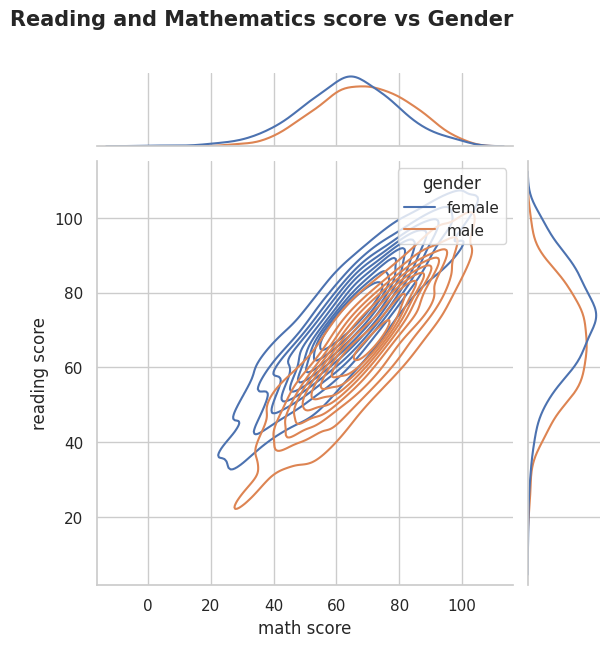

In [27]:
sns.set_context("notebook")
sns.jointplot(data=df, x="math score", y="reading score", hue="gender", kind="kde")
plt.title('Reading and Mathematics score vs Gender', fontsize=15, fontweight='bold',y=1.3,loc="right")
plt.show()

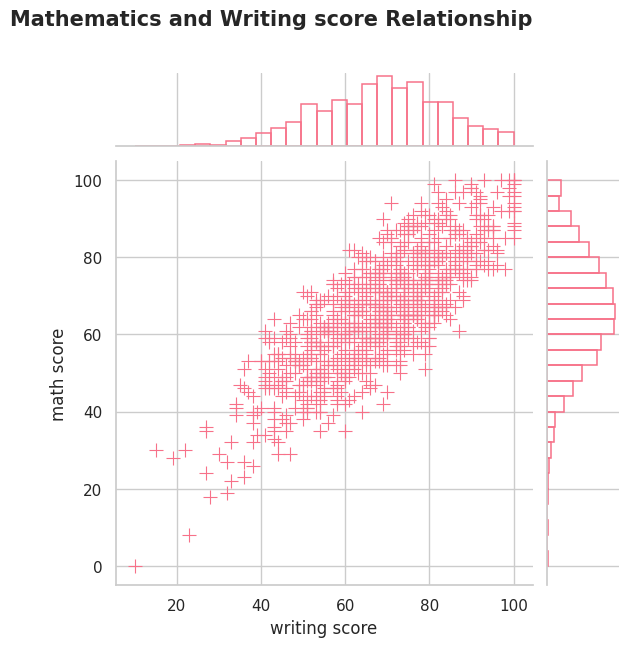

In [28]:
sns.set_palette("husl", 9)
sns.jointplot(
    data=df, x="writing score", y="math score",
    marker="+", s=100, marginal_kws=dict(bins=25, fill=False),
)
plt.title('Mathematics and Writing score Relationship', fontsize=15, fontweight='bold',y=1.3,loc="right")
plt.show()

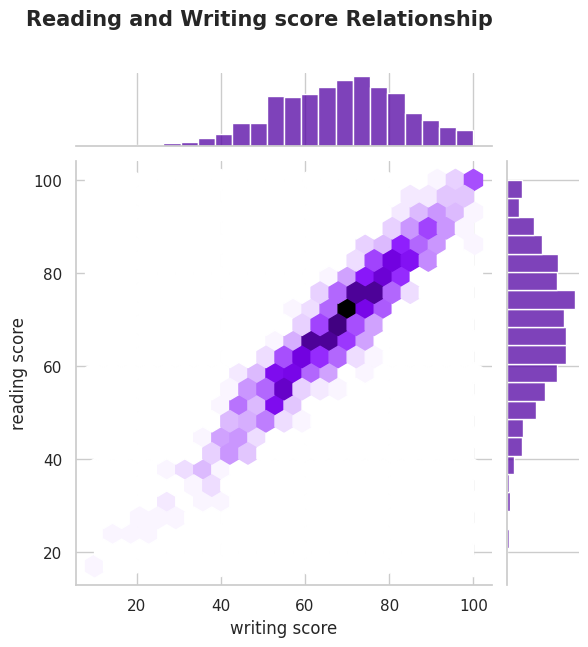

In [29]:
sns.set_palette("plasma")
sns.jointplot(data=df, x="writing score", y="reading score", kind="hex")
plt.title('Reading and Writing score Relationship', fontsize=15, fontweight='bold',y=1.3,loc="right")
plt.show()

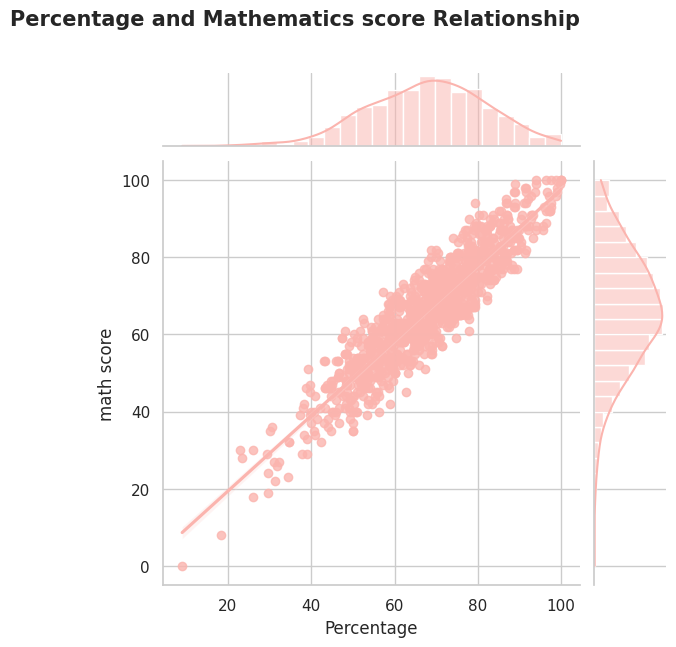

In [30]:
sns.set_palette("Pastel1")
sns.jointplot(data=df, x="Percentage", y="math score", kind="reg")
plt.title('Percentage and Mathematics score Relationship', fontsize=15, fontweight='bold',y=1.3,loc="right")
plt.show()

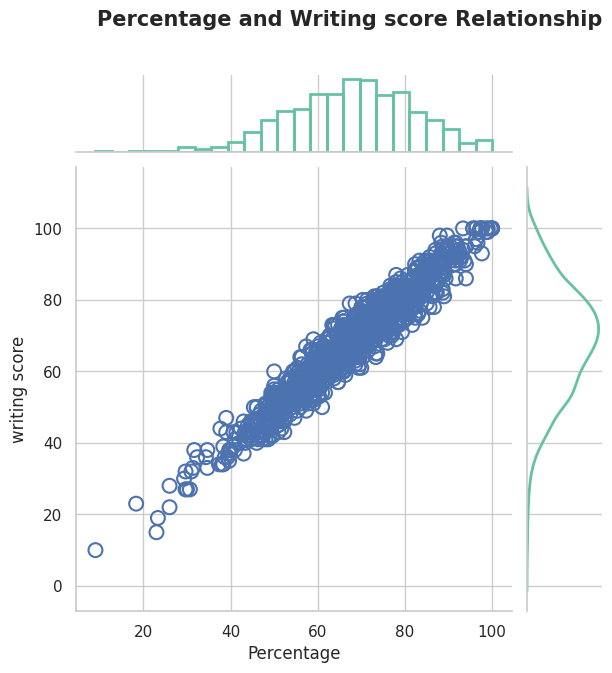

In [31]:
sns.set_palette("Set2")
g = sns.JointGrid()
x, y = df["Percentage"], df["writing score"]
sns.scatterplot(x=x, y=y, ec="b", fc="none", s=100, linewidth=1.5, ax=g.ax_joint)
sns.histplot(x=x, fill=False, linewidth=2, ax=g.ax_marg_x)
sns.kdeplot(y=y, linewidth=2, ax=g.ax_marg_y)
plt.title('Percentage and Writing score Relationship', fontsize=15, fontweight='bold',y=1.3,loc="right")
plt.show()

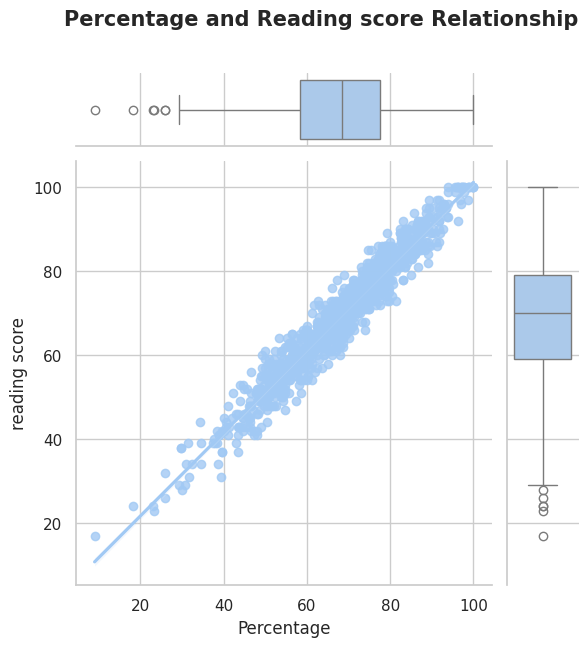

In [32]:
sns.set_context("notebook")
sns.set_palette("pastel")
g = sns.JointGrid(data=df, x="Percentage", y="reading score")
g.plot(sns.regplot, sns.boxplot)
plt.title('Percentage and Reading score Relationship', fontsize=15, fontweight='bold',y=1.3,loc="right")
plt.show()

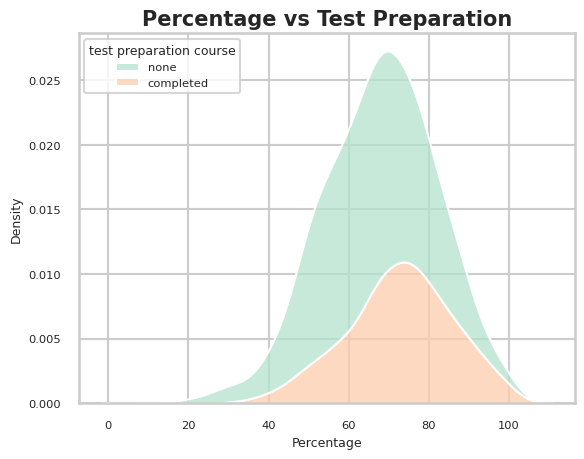

In [33]:
sns.set_context("talk",font_scale=0.5)
sns.set_palette("Pastel2")
sns.kdeplot(data=df, x="Percentage", hue="test preparation course", multiple="stack")
plt.title('Percentage vs Test Preparation',fontsize=15, fontweight='bold')

plt.show()

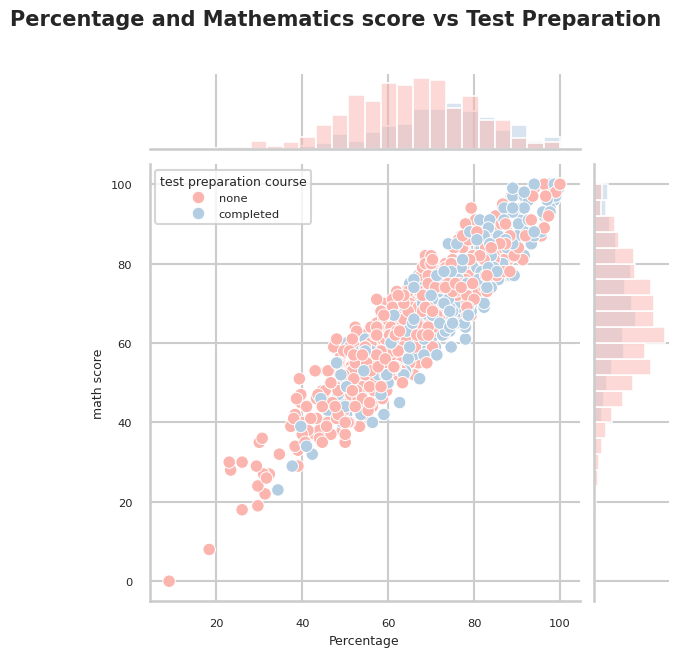

In [34]:
sns.set_palette("Pastel1")
g = sns.JointGrid(data=df, x="Percentage", y="math score", hue="test preparation course")
g.plot(sns.scatterplot, sns.histplot)
plt.title('Percentage and Mathematics score vs Test Preparation ', fontsize=15, fontweight='bold',y=1.3,loc="right")
plt.show()

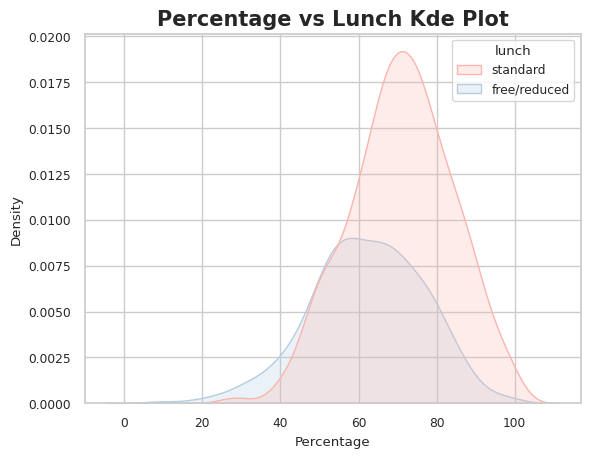

In [35]:
sns.set_context("notebook",font_scale=0.8)
sns.kdeplot(data=df, x="Percentage", hue="lunch", multiple="layer",fill=True)
plt.xlabel('Percentage')
plt.title('Percentage vs Lunch Kde Plot',fontsize=15, fontweight='bold')

plt.show()

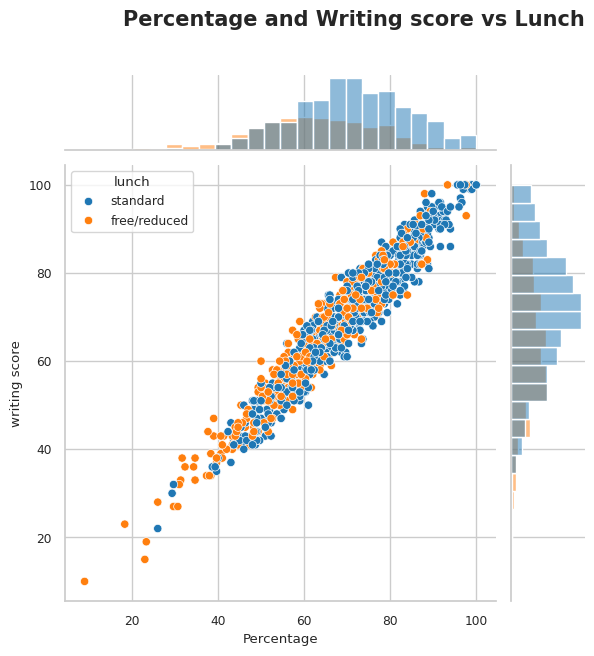

In [36]:
sns.set_palette("tab10")
g = sns.JointGrid(data=df, x="Percentage", y="writing score", hue="lunch")
g.plot(sns.scatterplot, sns.histplot)
plt.title('Percentage and Writing score vs Lunch', fontsize=15, fontweight='bold',y=1.3,loc="right")
plt.show()

In [48]:
df[(df['race/ethnicity']=='group B')]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Percentage,grade
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667,B
2,female,group B,master's degree,standard,none,90,95,93,92.666667,A
5,female,group B,associate's degree,standard,none,71,83,78,77.333333,B
6,female,group B,some college,standard,completed,88,95,92,91.666667,A
7,male,group B,some college,free/reduced,none,40,43,39,40.666667,F
...,...,...,...,...,...,...,...,...,...,...
969,female,group B,bachelor's degree,standard,none,75,84,80,79.666667,B
976,male,group B,some college,free/reduced,completed,60,62,60,60.666667,D
980,female,group B,high school,free/reduced,none,8,24,23,18.333333,F
982,male,group B,some high school,standard,completed,79,85,86,83.333333,A


In [49]:
df["grade"].value_counts()

,count
grade,
C,258
B,255
D,188
A,157
E,86
F,34
O,22


In [50]:
df["grade"].index.sort_values()

RangeIndex(start=0, stop=1000, step=1)

In [51]:
df[df['grade']=='F'].groupby('gender').count()

,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Percentage,grade
gender,,,,,,,,,
female,18,18,18,18,18,18,18,18,18
male,16,16,16,16,16,16,16,16,16


In [52]:
df["race/ethnicity"].value_counts()

,count
race/ethnicity,
group C,319
group D,262
group B,190
group E,140
group A,89


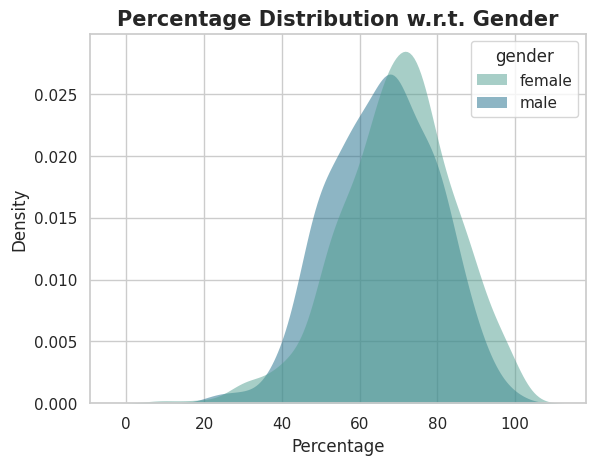

In [53]:
sns.set_context("notebook",font_scale=1)

sns.kdeplot(
   data=df, x="Percentage", hue="gender",
   fill=True, common_norm=False, palette="crest",
   alpha=.5, linewidth=0,
)
plt.title('Percentage Distribution w.r.t. Gender',fontsize=15, fontweight='bold')

plt.show()

In [54]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score', 'Percentage', 'grade'],
      dtype='object')

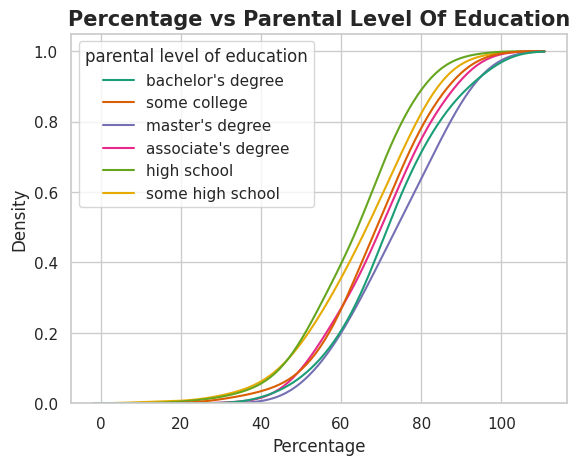

In [55]:
sns.set_palette("Dark2")
sns.set_context("notebook",font_scale=1)
sns.kdeplot(
    data=df, x="Percentage", hue="parental level of education",
    cumulative=True, common_norm=False, common_grid=True,
)
plt.title('Percentage vs Parental Level Of Education',fontsize=15, fontweight='bold')

plt.show()

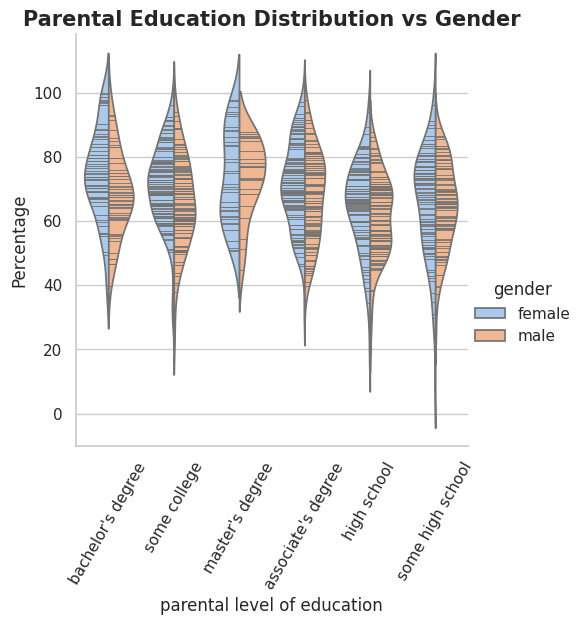

In [56]:
sns.catplot(x="parental level of education", y="Percentage", hue="gender",
            kind="violin", inner="stick", split=True,
            palette="pastel", data=df)
plt.title('Parental Education Distribution vs Gender',fontsize=15, fontweight='bold')
plt.xticks(rotation=60)
plt.show()

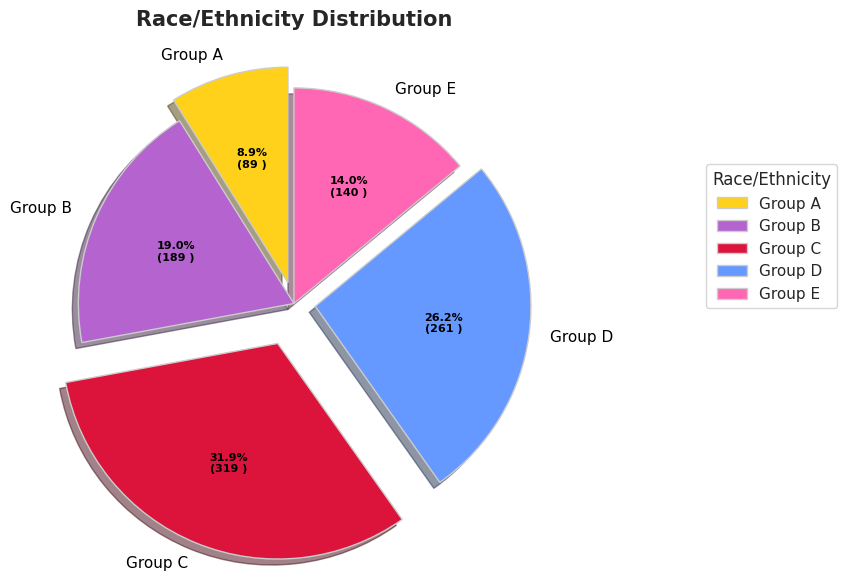

In [57]:
race = ['Group A', 'Group B ', 'Group C',
        'Group D', 'Group E']

data = [89, 190, 319, 262, 140]


# Creating explode data
explode = ( 0.1, 0,0.2, 0.1, 0)

# Creating color parameters
colors = (  "#ffd11a", "#b463cf",
          "#DC143C", "#6699ff", "#ff66b3" )

# Wedge properties
wp = { 'linewidth' : 1, 'edgecolor' : "#cccccc" }

# Creating autocpt arguments
def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n({:d} )".format(pct, absolute)

# Creating plot
fig, ax = plt.subplots(figsize =(10, 7))
wedges, texts, autotexts = ax.pie(data,
                                  autopct = lambda pct: func(pct, data),
                                  explode = explode,
                                  labels = race,
                                  shadow = True,
                                  colors = colors,
                                  startangle = 90,
                                  wedgeprops = wp,
                                  textprops = dict(color ="#000000"))

# Adding legend
ax.legend(wedges, race,
          title ="Race/Ethnicity",
          loc ="center left",
          bbox_to_anchor =(1.25, 0, 0, 1.25))

plt.setp(autotexts, size = 8, weight ="bold")
ax.set_title("Race/Ethnicity Distribution", fontsize=15, fontweight='bold')

# show plot
plt.show()

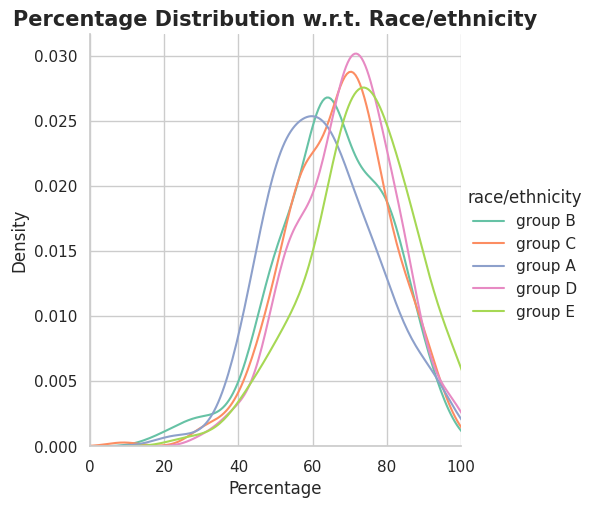

In [58]:
sns.set_palette("Set2")
(sns.FacetGrid(df,hue="race/ethnicity", height=5,xlim = (0,100)).map(sns.kdeplot, "Percentage").add_legend())
plt.title('Percentage Distribution w.r.t. Race/ethnicity',fontsize=15, fontweight='bold')

plt.show()

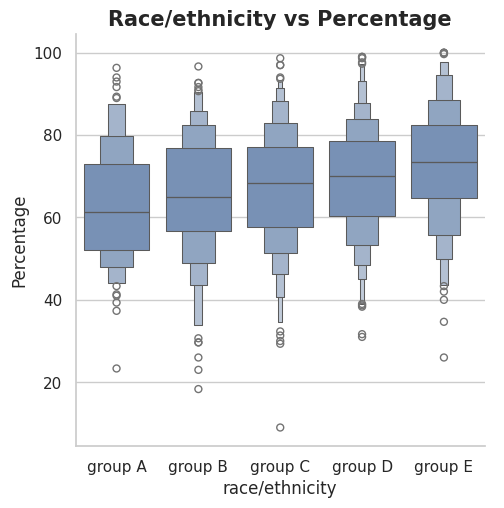

In [59]:
sns.set_palette("vlag")
sns.catplot(x="race/ethnicity", y="Percentage", kind="boxen",
            data=df.sort_values("race/ethnicity"))
plt.title('Race/ethnicity vs Percentage',fontsize=15, fontweight='bold')

plt.show()

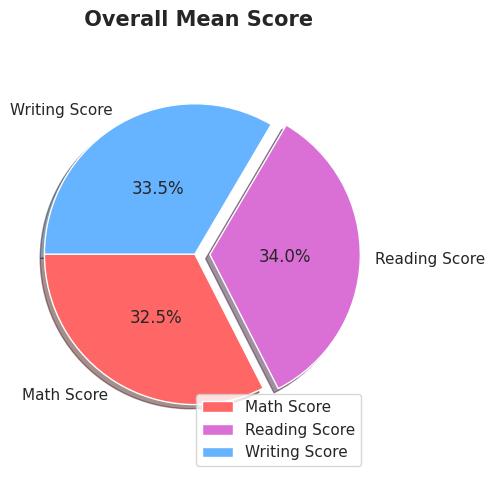

In [60]:
plt.figure(figsize=(5,5))
labels=['Math Score', 'Reading Score', 'Writing Score']
colors=['#ff6666','orchid','#66b3ff']
explode=[0,0.1,0]
values=[df["math score"].mean(),df["reading score"].mean(),df["writing score"].mean()]

plt.pie(values,labels=labels,colors=colors,explode=explode,autopct='%1.1f%%',shadow=True,startangle=180,pctdistance=0.5)
plt.legend(['Math Score', 'Reading Score', 'Writing Score'],loc='lower right')
plt.axis('equal')
plt.title(' Overall Mean Score  ',fontsize=15, fontweight='bold')
plt.tight_layout()
plt.show()

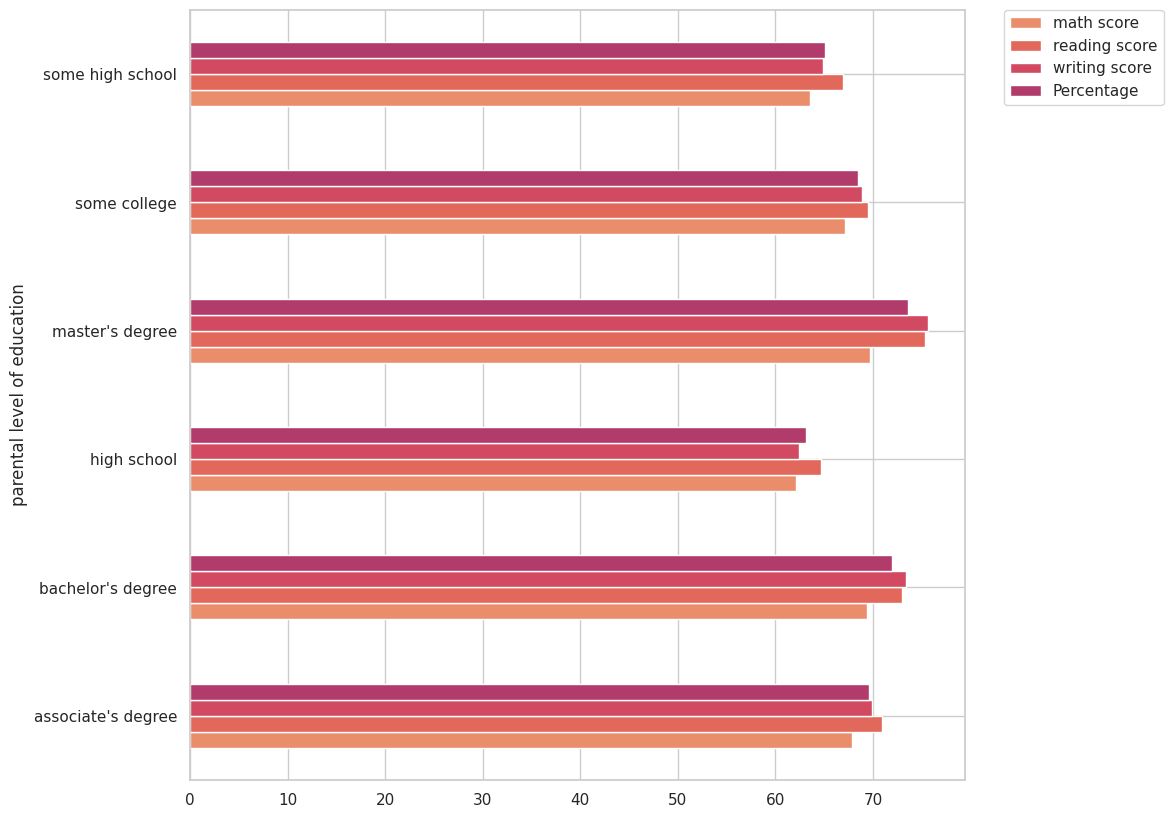

In [67]:
sns.set_palette("flare")
df.groupby('parental level of education').agg('mean', numeric_only=True).plot(kind='barh',figsize=(10,10))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);

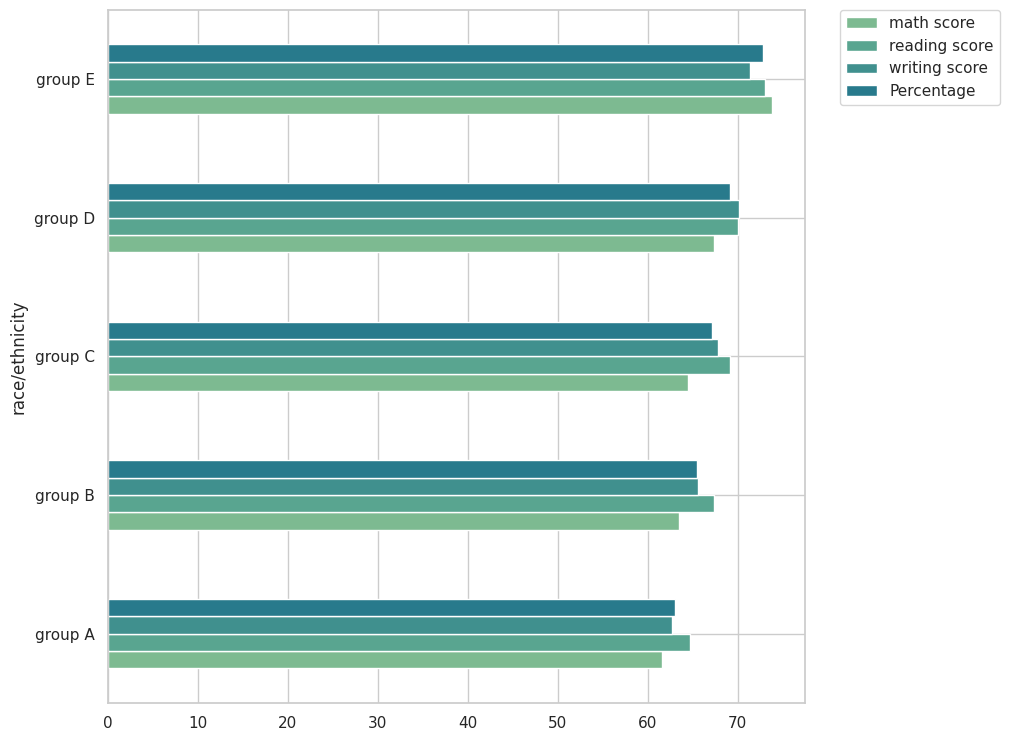

In [65]:
sns.set_palette("crest")
df.groupby('race/ethnicity').agg('mean', numeric_only=True).plot(kind='barh',figsize=(9,9))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);

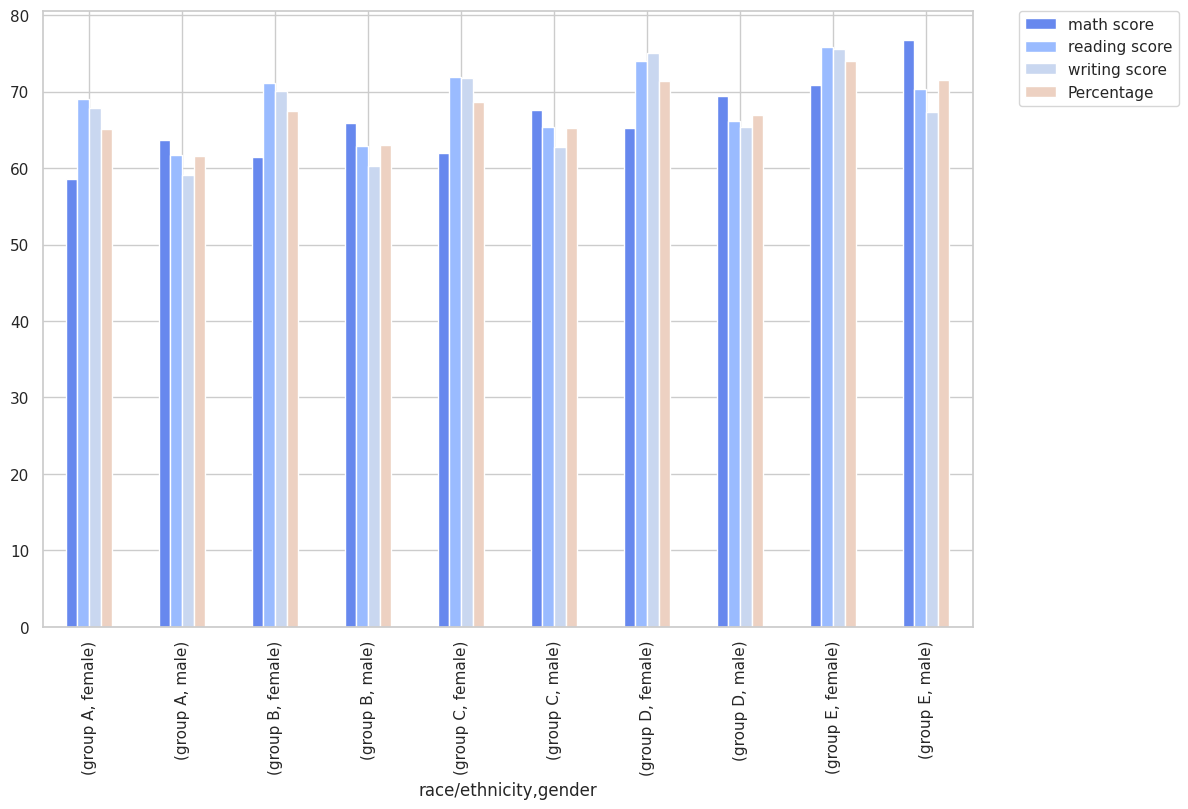

In [66]:
sns.set_palette("coolwarm")
df.groupby(['race/ethnicity','gender']).agg('mean', numeric_only=True).plot(kind='bar',figsize=(12,8))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);